In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# File paths
bar_locations_path = 'C:\\Users\\ljabl\\OneDrive\\Desktop\\bar_locations.csv'
party_nyc_path = 'C:\\Users\\ljabl\\OneDrive\\Desktop\\party_in_nyc.csv'

In [3]:
# Load the datasets
bars_df = pd.read_csv(bar_locations_path)
party_df = pd.read_csv(party_nyc_path)

In [4]:
# Display the first few rows of each dataset
bars_df.head(), party_df.head()

(         Location Type  Incident Zip           City        Borough   Latitude  \
 0  Club/Bar/Restaurant       10308.0  STATEN ISLAND  STATEN ISLAND  40.544096   
 1  Club/Bar/Restaurant       10012.0       NEW YORK      MANHATTAN  40.729793   
 2  Club/Bar/Restaurant       10308.0  STATEN ISLAND  STATEN ISLAND  40.544209   
 3  Club/Bar/Restaurant       10034.0       NEW YORK      MANHATTAN  40.866376   
 4  Club/Bar/Restaurant       11220.0       BROOKLYN       BROOKLYN  40.635207   
 
    Longitude  num_calls  
 0 -74.141155         40  
 1 -73.998842         18  
 2 -74.141040         21  
 3 -73.928258        160  
 4 -74.020285         17  ,
           Created Date          Closed Date               Location Type  \
 0  2015-12-31 00:01:15  2015-12-31 03:48:04            Store/Commercial   
 1  2015-12-31 00:02:48  2015-12-31 04:36:13            Store/Commercial   
 2  2015-12-31 00:03:25  2015-12-31 00:40:15  Residential Building/House   
 3  2015-12-31 00:03:26  2015-12-31 01:

In [5]:
# Set up the figure
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

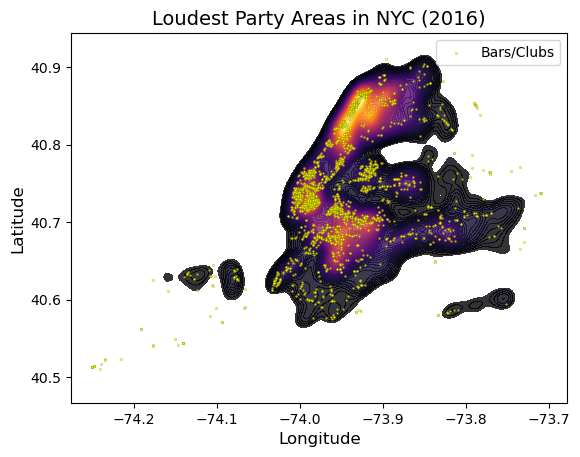

In [6]:
# Plot heatmap of noise complaints
sns.kdeplot(
    x=party_df["Longitude"], 
    y=party_df["Latitude"], 
    cmap="inferno", 
    fill=True, 
    alpha=0.8, 
    levels=60
)

# Overlay bar locations
sns.scatterplot(
    x=bars_df["Longitude"], 
    y=bars_df["Latitude"], 
    s= 3,
    color="yellow", 
    alpha=0.7, 
    edgecolor="black", 
    label="Bars/Clubs"
)

# Labels and title
plt.title("Loudest Party Areas in NYC (2016)", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend()

# Show plot
plt.show()


In [7]:
# Aggregate complaints by borough
complaints_by_borough = party_df["Borough"].value_counts()

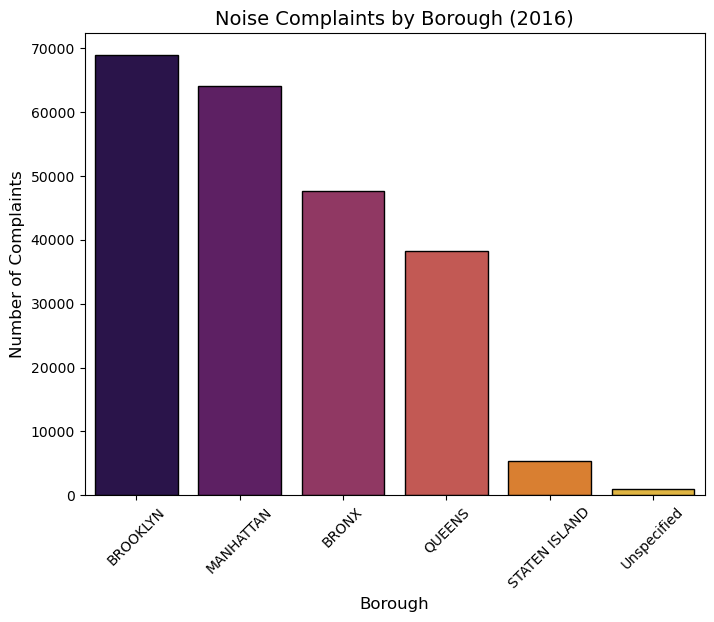

In [14]:
# Plot high-contrast bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=complaints_by_borough.index,
    y=complaints_by_borough.values,
    palette="inferno",
    edgecolor="black"
)

# Labels and title
plt.title("Noise Complaints by Borough (2016)", fontsize=14)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [10]:
# Convert created date to datetime and extract weekday
party_df["Created Date"] = pd.to_datetime(party_df["Created Date"])
party_df["Weekday"] = party_df["Created Date"].dt.day_name()

In [11]:
# Aggregate complaints by weekday in order
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
complaints_by_weekday = party_df["Weekday"].value_counts().reindex(weekday_order)

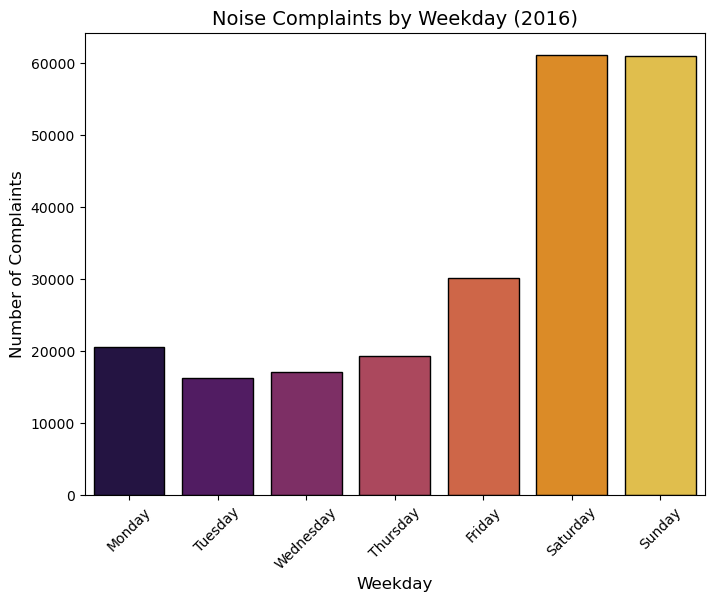

In [12]:
# Plot high-contrast bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=complaints_by_weekday.index,
    y=complaints_by_weekday.values,
    palette="inferno",
    edgecolor="black"
)

# Labels and title
plt.title("Noise Complaints by Weekday (2016)", fontsize=14)
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xticks(rotation=45)

plt.show()

In [15]:
# Extract hour
party_df["Hour"] = party_df["Created Date"].dt.hour

In [16]:
# Aggregate complaints by hour
complaints_by_hour = party_df["Hour"].value_counts().sort_index()

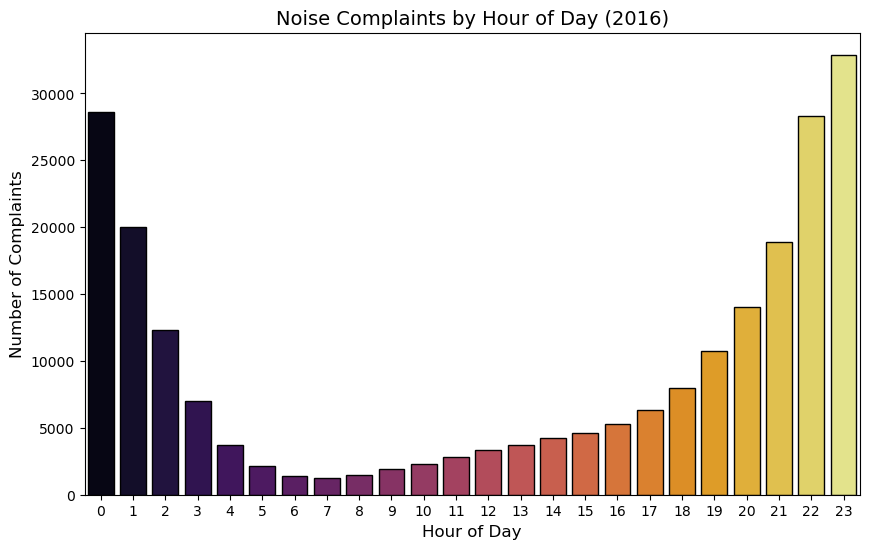

In [18]:
# Plot high-contrast bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=complaints_by_hour.index,
    y=complaints_by_hour.values,
    palette="inferno",
    edgecolor="black"
)

# Labels and title
plt.title("Noise Complaints by Hour of Day (2016)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)

plt.show()

In [23]:
# Extract date
party_df["Date"] = party_df["Created Date"].dt.date

In [24]:
# Aggregate complaints by date
complaints_by_date = party_df["Date"].value_counts().sort_index()

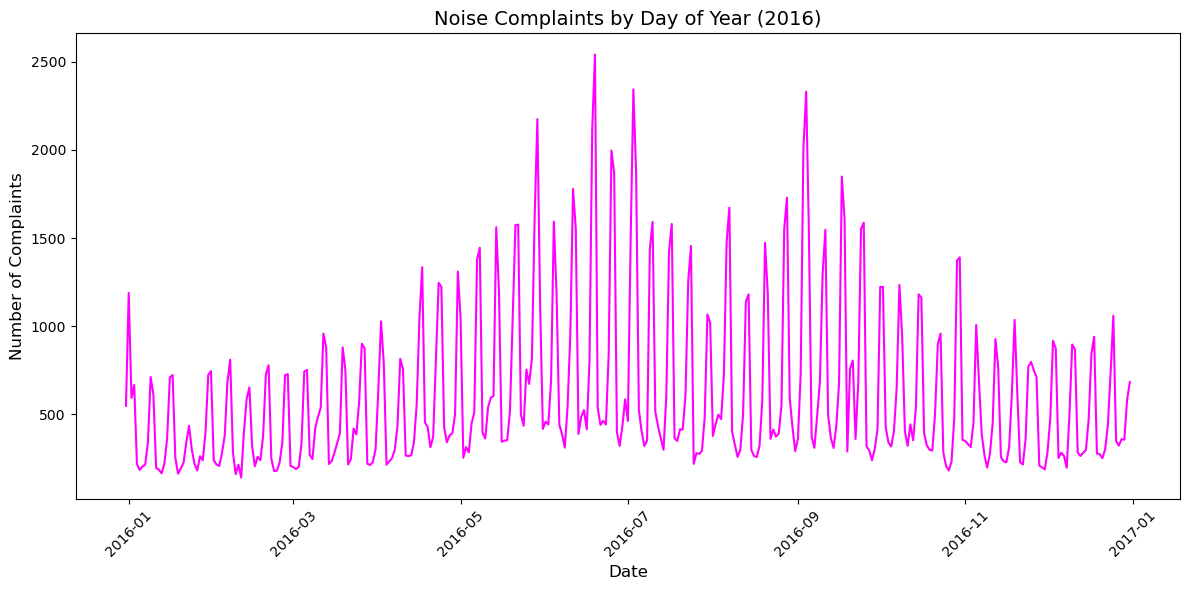

In [27]:
# Plot high-contrast line chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=complaints_by_date.index,
    y=complaints_by_date.values,
    color ="magenta"
)

# Labels and title
plt.title("Noise Complaints by Day of Year (2016)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Complaints", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()